<br><br>
<font size='6'><b>Discrete Signals</b></font>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Discrete Time Signals

A __signal__ $x[n]$ is a function that maps an independent variable to a dependent variable.

In this course, we will focus on discrete-time signals $x[n]$:
- Independent variable is an integer: $n \in \mathbb{Z}$
- Dependent variable is a real or complex number: $x[n] \in \mathbb{R}$ or $\mathbb{C}$

<br><br>
<center><img src="./image_files/discrete_signal_example.png" width = 500></center>
<br>


## 1.1. Plot Real Signals

- `plot` for continuous signals in Python

- `stem` for discrete signals in Python

$$x(t) = \sin(2\pi t)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

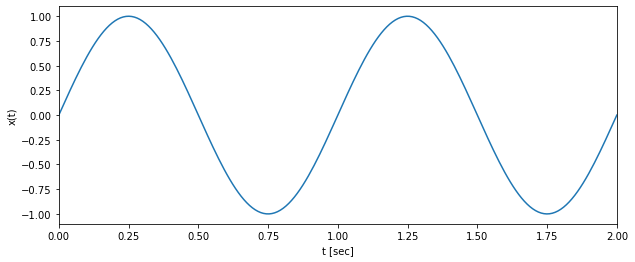

In [2]:
# plot x(t) = sin(2 pi t)

t = np.linspace(0,2,200)
x = np.sin(2*np.pi*t)

# plot
plt.figure(figsize = (10,4))
plt.plot(t, x)
plt.xlim([np.min(t), np.max(t)])
plt.xlabel('t [sec]')
plt.ylabel('x(t)')
plt.show()

$$x[n] = \sin \left(\frac{2 \pi}{N}n \right)$$

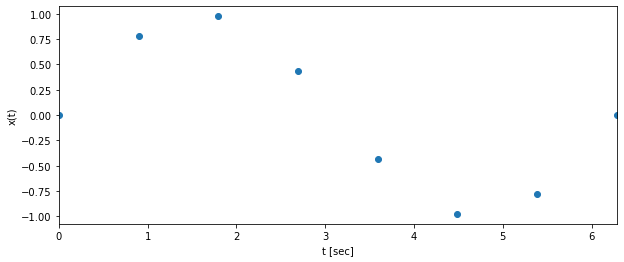

In [3]:
# use plot 'o' option and stem

# plot x(t) = sin(2 pi t)
t = np.linspace(0,2*np.pi,8)
x = np.sin(t)

# plot
plt.figure(figsize = (10,4))
plt.plot(t, x,'o')
plt.xlim([np.min(t), np.max(t)])
plt.xlabel('t [sec]')
plt.ylabel('x(t)')
plt.show()

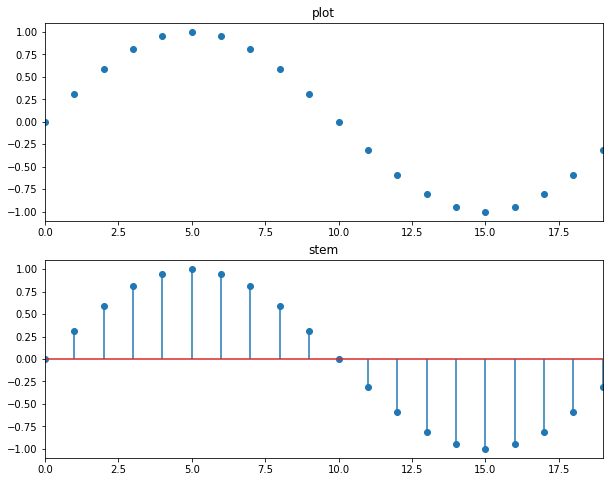

In [4]:
# use plot 'o' option and stem
N = 20
n = np.arange(0, N)
x = np.sin(2*np.pi/N*n)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(n, x, 'o')
plt.xlim([np.min(n), np.max(n)])
plt.title('plot')

plt.subplot(2,1,2)
plt.stem(n, x)
plt.xlim([np.min(n), np.max(n)])
plt.title('stem')
plt.show()

## 1.2. Signal Sounds

In [11]:
temp = wavfile.read('./data_files/hamlet.wav')

In [13]:
temp

(44100, array([-272, -280, -288, ...,   74,   60,   60], dtype=int16))

In [5]:
from scipy.io import wavfile
from IPython.display import Audio

fs, data = wavfile.read('./data_files/hamlet.wav')

In [6]:
fs # sampling rate

44100

In [10]:
#data.shape[0]
data.shape
#data.shape[0]/fs # 3.28초 짜리 data

(145000,)

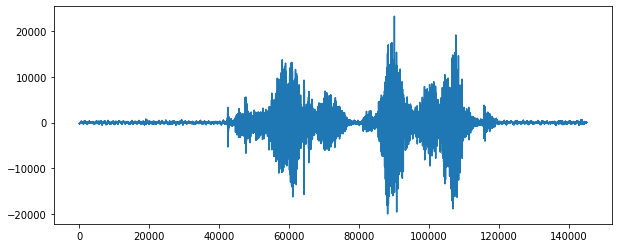

In [8]:
# signal: 'ALas, Poor Yorick!'
# plot this signal

plt.figure(figsize = (10, 4))
plt.plot(data)
plt.show()

In [64]:
Audio(data, rate=fs)

In [30]:
Audio('./data_files/hamlet.wav')

$$x[n] = \cos \left(\frac{2 \pi}{N}k n \right)$$

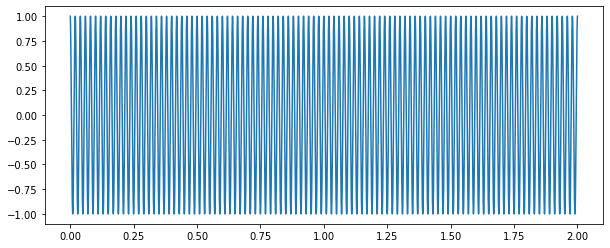

In [10]:
# cosine wave

N = 44100
n = np.arange(0, 2*N)

# change this value from 20 to 20000
k = 50 # frequency
# x[n] = cos (2 pi k n/ N)
coswave = np.cos(2*np.pi*k*n/N)

# plot
plt.figure(figsize = (10, 4))
plt.plot(n/fs, coswave)
plt.show()

In [41]:
Audio(coswave, rate = fs)

Chirp

$$x[n] = 0.3 \cos \left(\frac{2 \pi}{3000000}n^2 \right)$$

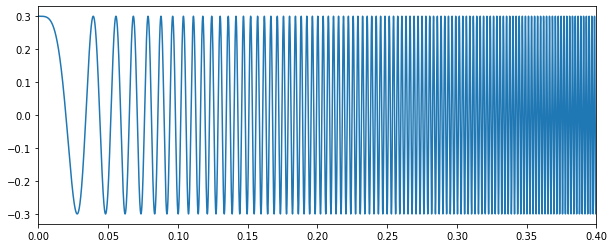

In [5]:
# 2s chirp (https://en.wikipedia.org/wiki/Chirp)
n = np.arange(0,44100*2)
chirp = 0.3*np.cos(2*np.pi/3000000*n**2)

# plot
plt.figure(figsize = (10, 4))
plt.plot(n/fs, chirp) # n은 데이터의 갯수, fs는 sampling rate,  n/fs : 시간으로의 길이(재생시간)
plt.xlim([0, 0.4])
plt.show()

In [44]:
Audio(chirp, rate = fs)

White noise

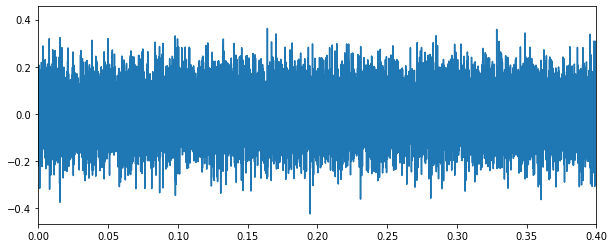

In [12]:
# white gaussian noise
noise = 0.1*np.random.randn(2*N,1)

# plot
plt.figure(figsize = (10, 4))
plt.plot(n/fs, noise)
plt.xlim([0, 0.4])
plt.show()

In [46]:
Audio(noise.T, rate = fs) 

# 2. Complex Sinusoid

## 2.1. Complex Numbers

$$z_1 = a_1 + b_1i, \quad \vec{z}_1 = \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} $$


<br>
$$z_2 = a_2 + b_2i, \quad \vec{z}_2 = \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} $$


- Addition

$$
\begin{align*}
z &= z_1 + z_2 = (a_1 + a_2) + (b_1 + b_2)i \\ \\
\vec{z} &= \vec{z}_1 + \vec{z}_2 
= \begin{bmatrix} a_1 \\ b_1 \end{bmatrix}+ \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} 
= \begin{bmatrix} a_1 + a_2 \\ b_1 + b_2 \end{bmatrix} 
\end{align*}
$$

<br><br>
<center><img src="./image_files/complex_add.png" width = 250></center>
<br>

- Multiplication 


$$\begin{cases}
z_1=r_1e^{i\theta_1}\\ \\
z_2=r_2e^{i\theta_2}
\end{cases}
\quad\Longrightarrow\quad
\begin{cases}
z_1\centerdot z_2=r_1r_2e^{i(\theta_1+\theta_2)} \\ \\
{z_1 \over z_2}={r_1 \over r_2}e^{i(\theta_1-\theta_2)}
\end{cases}
$$
<br><br>

- __Euler's Formula__: 

$$ e^{i\theta} = \text{cos}\theta + i\text{sin}{\theta}$$


- Complex number in complex exponential

$$
\begin{align*}
\vec{z} &= r \, \text{cos}\theta + i\,r\,\text{sin}\theta \\
 &= r\,(\text{cos}\theta + i\text{sin}\theta) \\
 &= re^{i\theta}\\ \\
r &: \text{magnitude (length)} \\
\theta &: \text{phase (angle)}
\end{align*}
$$

<br><br>
<img src="./image_files/Euler_fomula.png" width = 250>
<br>

- When $x[n] \in \mathbb{C}$, we can use two signal plots

<br>

$$
\begin{align*}
x[n] &= \text{Re}\{x[n]\} + j \text{Im} \{x[n]\} & \text{Rectangular form}\\\\
x[n] &= \lvert x[n] \rvert e^{j \angle x[n]} & \text{Polar form}
\end{align*}
$$

<br>

- For $e^{j \omega t}$

<br><br>
<img src="./image_files/complex_sinusoidal.png" width = 900>
<br>

## 2.2. Geometrical Meaning of $e^{i\theta}$

- $e^{i\theta}: \text{point on the unit circle with angle of } \theta$

<br>
<img src="./image_files/Geometrical_Meaning_Point.png" width = 300>


<br>

- $\theta = \omega t$


- $e^{i\omega t}: \text{rotating on an unit circle with angular velocity of } \omega$.

<br>
<center><img src="./image_files/Geometrical_Meaning_Omega.png" width = 300></center>
<br>

- Question: what is the physical meaning of $e^{-i\omega t}$?


- Frequency $\omega$ determines rotation speed and direction of a circular motion
    - $\omega > 0 \implies$ counterclockwise rotation
    - $\omega < 0 \implies$ clockwise rotation

## 2.3. Sinusoidal Functions from Circular Motions

<br><br>
<center><img src="./image_files/Projection_onto_axis.png" width = "650"></center>

- A complex sinusoid is a helix
    - Real part ($\cos$ term) is the projection onto the $\text{Re}$ axis.
    - Imaginary part ($\sin$ term) is the projection onto the $\text{Im}$ axis.

<img src="./image_files/rising_circular.gif" width = "320">


<br><br>

$$\text{cos}\;\omega t = \large{e^{i\omega t } + e^{-i\omega t} \over 2}$$

<img src="./image_files/oscillation3.gif" width = 320>



# 3. Discrete Sinusoids


Discrete Sinusoids 

<br>

$$
\begin{align*}x[n] &= A\cos(\omega_0 n + \phi)\quad \text{or}\\ \\
x[n] &= Ae^{j (\omega_0 n + \phi)} \qquad \text{where} \;\; \omega_0 = \frac{2\pi}{N}k\end{align*}$$

<br>

__Key question: which one is a higher frequency?__


$$\omega_0 = \pi ~~~ \text{or} ~~~ \omega_0 = \frac{3\pi}{2}$$

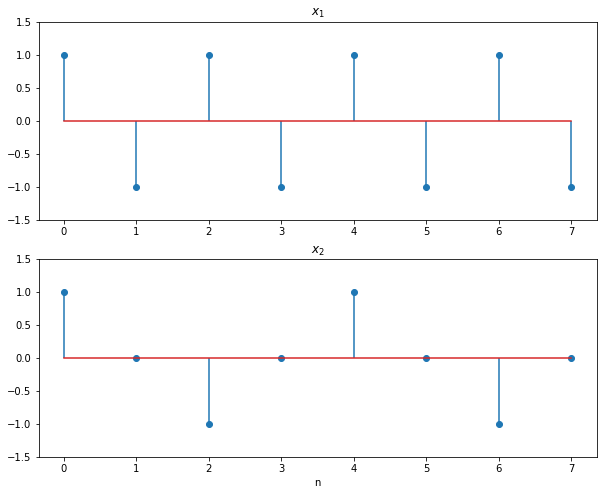

In [13]:
# show cosine stem angular velocity/step = pi and 3pi/2

n = np.arange(0, 8) # 0,1,2,3 ~ 7
x1 = np.cos(np.pi*n)
x2 = np.cos(3/2*np.pi*n)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.stem(n, x1)
plt.ylim([-1.5, 1.5])
plt.title('$x_1$')

plt.subplot(2,1,2)
plt.stem(n, x2)
plt.ylim([-1.5, 1.5])
plt.title('$x_2$')
plt.xlabel('n')
plt.show()

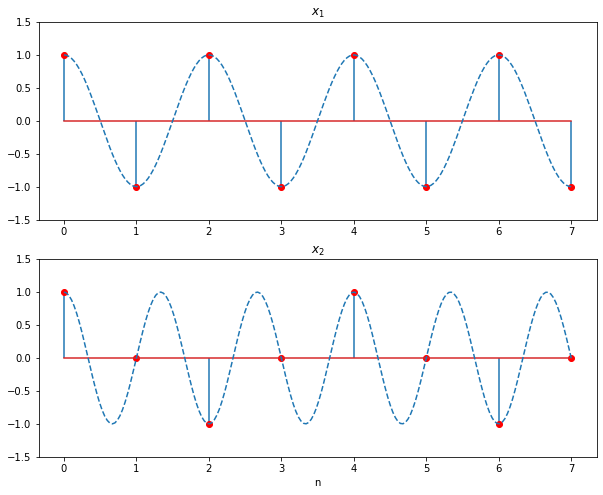

In [6]:
n = np.arange(0, 8)
x1 = np.cos(np.pi*n)
x2 = np.cos(3/2*np.pi*n)

n_real = np.linspace(0,7,200)
x1_real = np.cos(np.pi*n_real)
x2_real = np.cos(3/2*np.pi*n_real)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.stem(n, x1, markerfmt='ro')
plt.plot(n_real,x1_real,'--')
plt.ylim([-1.5, 1.5])
plt.title('$x_1$')

plt.subplot(2,1,2)
plt.stem(n, x2, markerfmt='ro')
plt.plot(n_real, x2_real,'--')
plt.ylim([-1.5, 1.5])
plt.title('$x_2$')
plt.xlabel('n')
plt.show()

## 3.1. Frequency in Discrete Sinusoids

$$0 \; \rightarrow \; \frac{1}{8}\pi \; \rightarrow \; \frac{2}{8}\pi \; \rightarrow \; \frac{8}{8}\pi$$

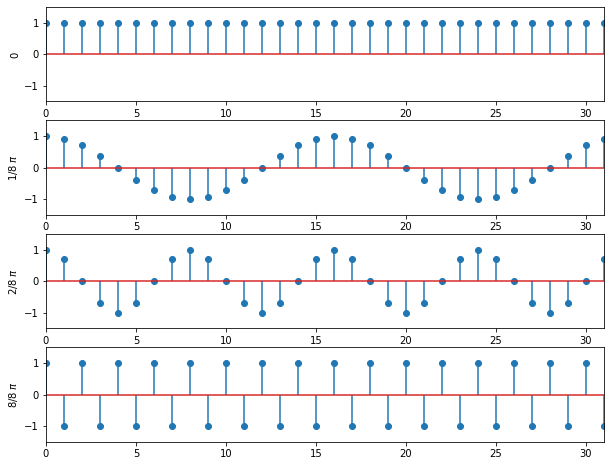

In [14]:
# plot 32 step ocsine stem for angular velocity/step = 0, pi/8, 2pi/8, 8pi/8
N = 32

n = np.arange(0, 32)
x1 = np.cos(0*np.pi*n)
x2 = np.cos(1/8*np.pi*n)
x3 = np.cos(2/8*np.pi*n)
x4 = np.cos(1*np.pi*n)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(4,1,1)
plt.stem(n, x1)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('0')

plt.subplot(4,1,2)
plt.stem(n, x2)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('1/8 $\pi$')

plt.subplot(4,1,3)
plt.stem(n, x3)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('2/8 $\pi$')

plt.subplot(4,1,4)
plt.stem(n, x4)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('8/8 $\pi$')
plt.show()

$$2\pi \; \rightarrow \; \frac{15}{8}\pi \; \rightarrow \; \frac{14}{8}\pi \; \rightarrow \; \frac{8}{8}\pi$$

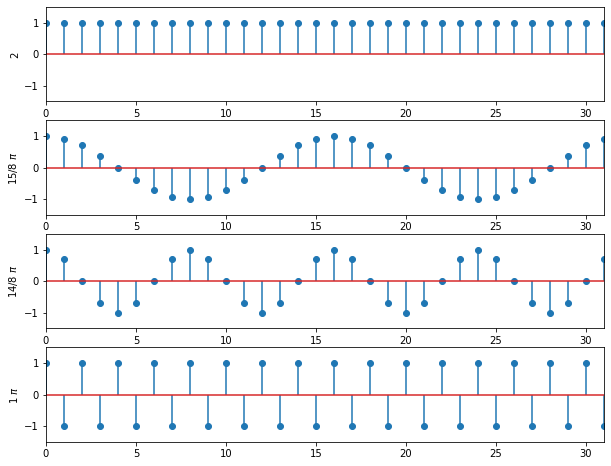

In [15]:
# plot 32 step ocsine stem for angular velocity/step = 2pi, 15pi/8, 14pi/8, 8pi/8
n = np.arange(0, 32)
x5 = np.cos(2*np.pi*n)
x6 = np.cos(15/8*np.pi*n)
x7 = np.cos(14/8*np.pi*n)
x8 = np.cos(1*np.pi*n)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(4,1,1)
plt.stem(n, x5)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('2')

plt.subplot(4,1,2)
plt.stem(n, x6)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('15/8 $\pi$')

plt.subplot(4,1,3)
plt.stem(n, x7)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('14/8 $\pi$')

plt.subplot(4,1,4)
plt.stem(n, x8)
plt.xlim([0, 31])
plt.ylim([-1.5, 1.5])
plt.ylabel('1 $\pi$')
plt.show()

## 3.2. Aliasing


Consider two sinusoids with two different frequencies

<br>

$$
\begin{align*}
\omega \quad &\implies \quad x_1[n] = e^{j(\omega n + \phi)}\\
\omega + 2 \pi \quad &\implies \quad x_2[n]= e^{j((\omega+2\pi) n + \phi)}=e^{j(\omega n + \phi)}e^{j2\pi n}
\end{align*}
$$
    


- But note that

$$x_2[n] = x_1[n]$$

- The signal $x_1$ and $x_2$ have different frequencies but are identical


- We say that $x_1$ and $x_2$ are aliases; this phenomenon is called aliasing


Aliasing occurs when a system is measured at an insufficient sampling rate. It is perhaps best explained through an example.

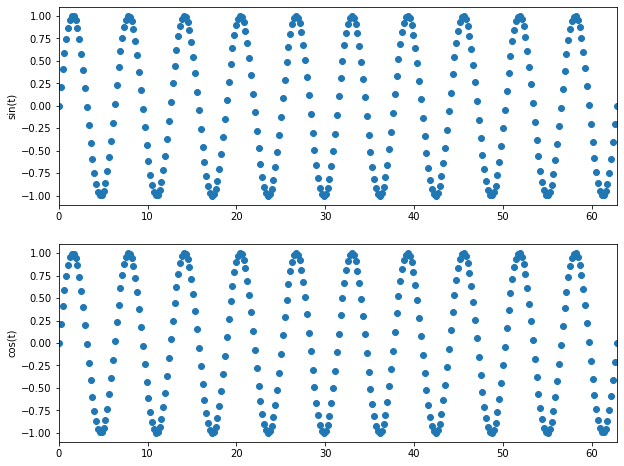

In [8]:
t = np.linspace(0, 10*2*np.pi, 300)
x = np.sin(t)
y = np.cos(t)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(t, x, 'o')
plt.xlim([np.min(t), np.max(t)])
plt.ylabel('sin(t)')

plt.subplot(2,1,2)
plt.plot(t, x, 'o')
plt.ylabel('cos(t)')
plt.xlim([np.min(t), np.max(t)])
plt.show()

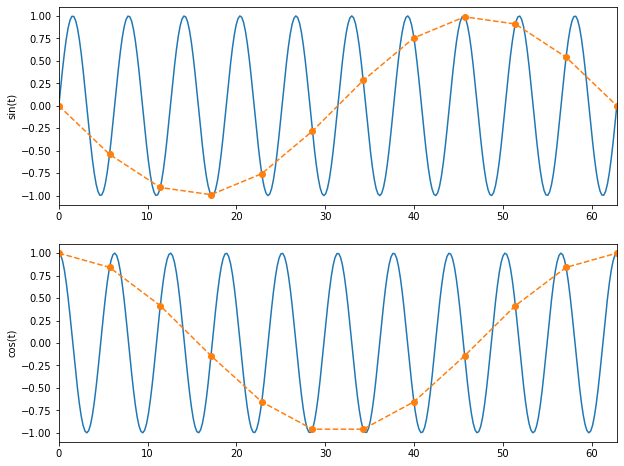

In [17]:
# reduce sampling rate to 12 and plot 
ts = np.linspace(0, 10*2*np.pi, 12)
xs = np.sin(ts)
ys = np.cos(ts)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(t, x)
plt.plot(ts, xs, 'o--')
plt.xlim([np.min(t), np.max(t)])
plt.ylabel('sin(t)')

plt.subplot(2,1,2)
plt.plot(t, y)
plt.plot(ts, ys, 'o--')
plt.ylabel('cos(t)')
plt.xlim([np.min(t), np.max(t)])
plt.show()

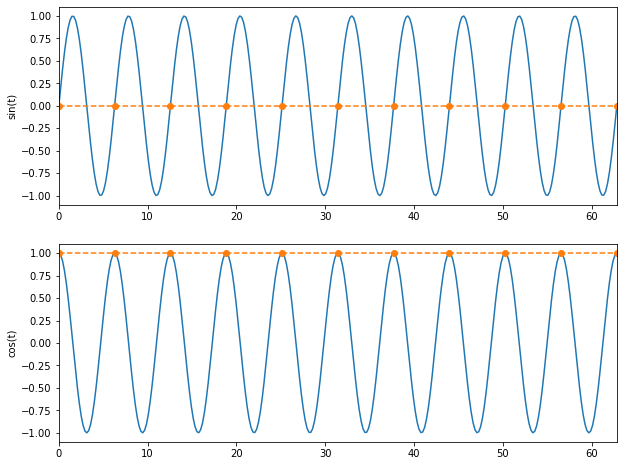

In [18]:
# reduce sampling rate to 11 and plot 
ts = np.linspace(0, 10*2*np.pi, 11)
xs = np.sin(ts)
ys = np.cos(ts)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(t, x)
plt.plot(ts, xs, 'o--')
plt.xlim([np.min(t), np.max(t)])
plt.ylabel('sin(t)')

plt.subplot(2,1,2)
plt.plot(t, y)
plt.plot(ts, ys, 'o--')
plt.ylabel('cos(t)')
plt.xlim([np.min(t), np.max(t)])
plt.show()

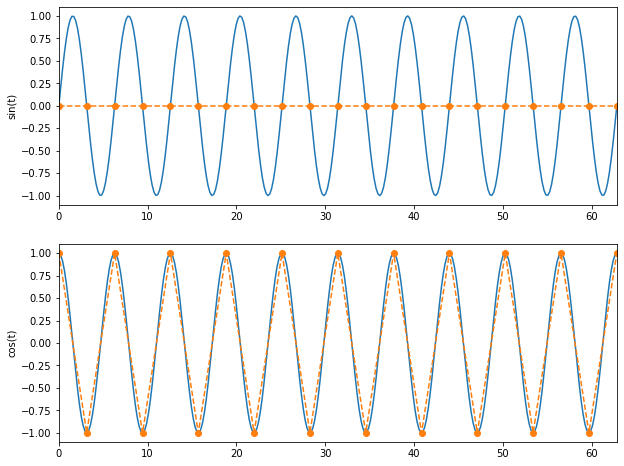

In [19]:
# reduce sampling rate to 21 and plot 
ts = np.linspace(0, 10*2*np.pi, 21)
xs = np.sin(ts)
ys = np.cos(ts)

# plot
plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(t, x)
plt.plot(ts, xs, 'o--')
plt.xlim([np.min(t), np.max(t)])
plt.ylabel('sin(t)')

plt.subplot(2,1,2)
plt.plot(t, y)
plt.plot(ts, ys, 'o--')
plt.ylabel('cos(t)')
plt.xlim([np.min(t), np.max(t)])
plt.show()

In [20]:
%%html
<center><iframe 
width="560" height="315" src="https://www.youtube.com/embed/jHS9JGkEOmA?rel=0" frameborder="0" allowfullscreen>
</iframe></center>

# 4. Fourier Series

## 4.1. Delta Dirac Function

$$ 
\sum_{n = 1,2,3,\cdots}\cos(n \theta) = \cos \theta + \cos 2\theta + \cos 3\theta + \cdots $$

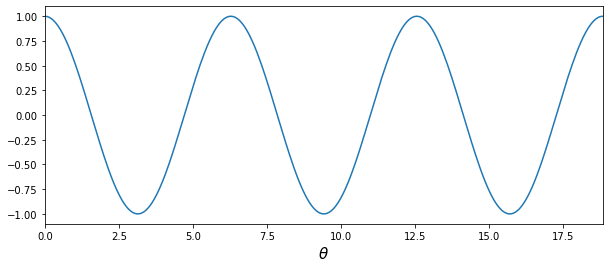

In [13]:
from scipy.fftpack import fft, ifft, fftshift

theta = np.linspace(0, 6*np.pi, 2**8)
x1 = np.cos(theta)

# plot
plt.figure(figsize = (10, 4))
plt.plot(theta, x1)
plt.ylim([-1.1, 1.1])
plt.xlim([np.min(theta), np.max(theta)])
plt.xlabel(r'$\theta$', fontsize = 15)
plt.show()

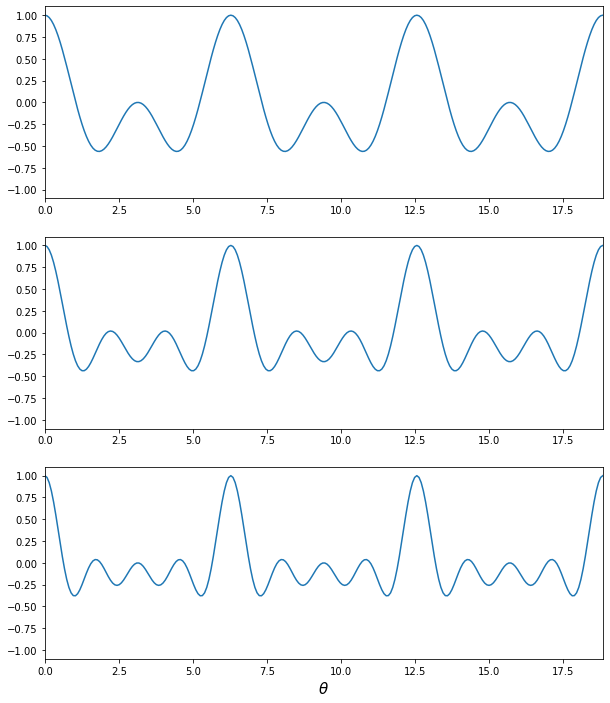

In [22]:
# plot until 2 theta, 3 theta, 4 theta
x2 = x1 + np.cos(2*theta)
x3 = x2 + np.cos(3*theta)
x4 = x3 + np.cos(4*theta)

# plot
plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
plt.plot(theta, x2/2)
plt.xlim([np.min(theta), np.max(theta)])
plt.ylim([-1.1, 1.1])

plt.subplot(3,1,2)
plt.plot(theta, x3/3)
plt.xlim([np.min(theta), np.max(theta)])
plt.ylim([-1.1, 1.1])

plt.subplot(3,1,3)
plt.plot(theta, x4/4)
plt.xlim([np.min(theta), np.max(theta)])
plt.ylim([-1.1, 1.1])
plt.xlabel(r'$\theta$', fontsize = 15)
plt.show()

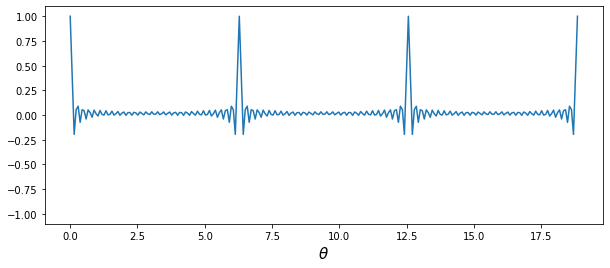

In [23]:
# plot Sigma[cos(n*theta)], n=30
x = np.zeros(theta.shape)

N = 30
for n in range(N):
    x = x + np.cos(n*theta)

# plot
plt.figure(figsize = (10, 4))
plt.plot(theta, x/N)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylim([-1.1, 1.1])
plt.show()

## 4.2. Square Wave

<br>

$$
\sum_{n = 1,3,5,\cdots}\frac{4}{\pi n} \sin (n\theta) = \frac{4}{\pi} \sin \theta + \frac{4}{3 \pi} \sin 3\theta + \frac{4}{5 \pi} \sin 5\theta + \cdots
$$

<br>

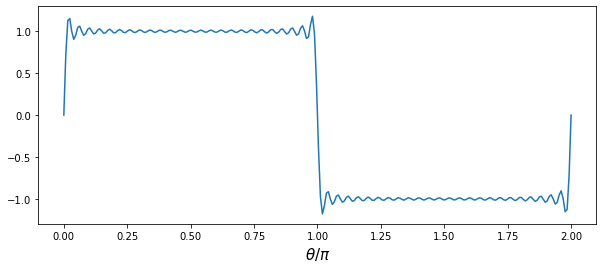

In [24]:
# plot square wave

N = 2**8
theta = np.linspace(0, 2*np.pi, N)
x = np.zeros(theta.shape)

for n in range(1, 50, 2):
    x = x + 4/(np.pi*n)*np.sin(n*theta)

# plot    
plt.figure(figsize = (10, 4))
plt.plot(theta/np.pi, x)
plt.xlabel(r'$\theta/\pi$', fontsize = 15)
plt.show()

## 4.3. How to Decompose a Signal into Fundamental Harmonic Sinusoids

- Signal representation by harmonic sinusoids

- Questions
    - how to decompose it to harmonic sinusoids
    - how to find the coefficients of harmonic sinusoids
    - how to find the frequency components


- DFT or FFT can do such a job !!!

<img src="./image_files/Fourier_transform.gif" width = 500>

## 4.4. Fast Fourier Transformation (FFT)

- FFT algorithms are so commonly employed to compute DFT that the term 'FFT' is often used to mean 'DFT'
    - The FFT has been called the "most important computational algorithm of our generation"
    - It uses the dynamic programming algorithm (or divide and conquer) to efficiently compute DFT.


- DFT refers to a mathematical transformation or function, whereas 'FFT' refers to a specific family of algorithms for computing DFTs.
    - use `fft` command to compute `dft`
    - `fft` (computationally efficient)


- We will use the embedded `fft` function without going too much into detail.


<img src="./image_files/FFT.png" style="border:1px solid black" width = 700>



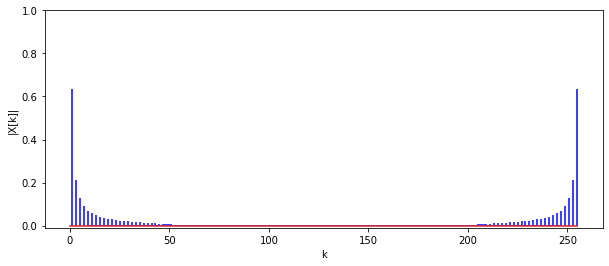

In [25]:
xt = fft(x, N)/N

# plot
plt.figure(figsize = (10, 4))
plt.stem(np.arange(0, N), np.abs(xt), 'b', markerfmt=' ')
plt.ylim([-0.01,1])
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.show()

$$
\sum_{n = 1,3,5,\cdots}\frac{4}{\pi n} \sin (n\theta) = \frac{4}{\pi} \sin \theta + \frac{4}{3 \pi} \sin 3\theta + \frac{4}{5 \pi} \sin 5\theta + \cdots$$


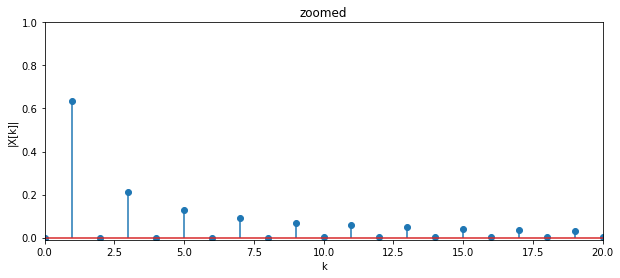

In [26]:
# plot
plt.figure(figsize = (10, 4))
plt.stem(np.arange(0, N), np.abs(xt))
plt.ylim([-0.01,1])
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('zoomed')
plt.xlim([0, 20])
plt.show()

__Example__

<br>
$$x[n] = e^{j\frac{2\pi}{8}n}$$
<br>

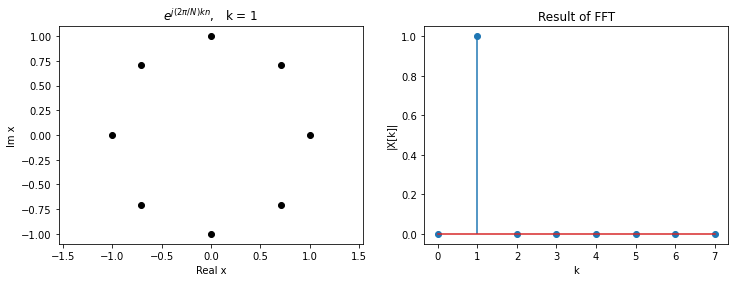

In [27]:
k = 1                  # index for frequency

N = 8
n = np.arange(0, N)    # sampling period

# harmonic complex exponential

x = np.exp(1j*2*np.pi/N*k*n) 
xt = fft(x)/N

# plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(np.real(x), np.imag(x), 'ko')
plt.axis('equal')
plt.xlabel('Real x')
plt.ylabel('Im x')
plt.title('$e^{j(2\pi/N) kn}$,   k = 1')

plt.subplot(1,2,2)
plt.stem(n, np.abs(xt))
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('Result of FFT')
plt.show()

$$x[n] = \cos \left(\frac{2\pi}{8}n \right)$$

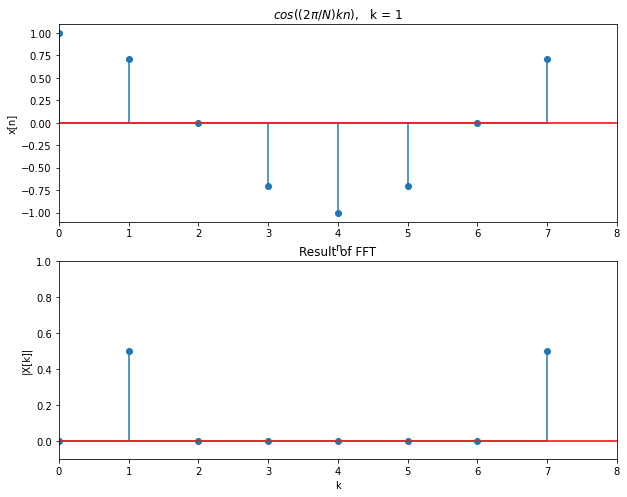

In [28]:
k = 1                      # index for frequency

N = 8
n = np.arange(0, N)        # sampling period

x = np.cos(2*np.pi/N*k*n)  # harmonic complex exponential
Xt = fft(x)/N

# plot
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.stem(n, np.real(x))
plt.xlim([0, 8])
plt.hlines(0,0,8, 'r')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$cos((2\pi/N) kn)$,   k = 1')

plt.subplot(2,1,2)
plt.stem(n, np.abs(Xt))
plt.xlim([0, 8])
plt.ylim([-0.1, 1])
plt.hlines(0,0,8, 'r')
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('Result of FFT')
plt.show()

- Remember
$$ \cos \omega t = \frac{e^{i \omega t} + e^{-i \omega t}}{2}$$

<img src="./image_files/oscillation3.gif" width = 300>

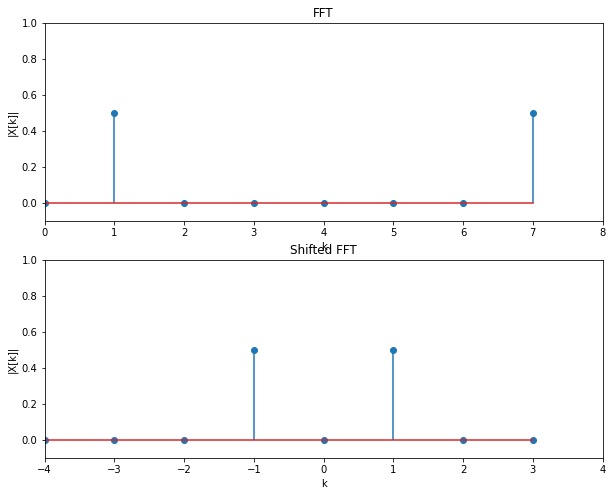

In [29]:
k = 1                      # index for frequency

N = 8
n = np.arange(0, N)        # sampling period

x = np.cos(2*np.pi/N*k*n)  # harmonic complex exponential

Xt = fft(x)/N
Xtshift = fftshift(Xt)

kr = np.hstack([np.arange(0, N/2), np.arange(-N/2, 0)])
ks = fftshift(kr)

# plot
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.stem(n, np.abs(Xt))
plt.xlim([0, 8])
plt.ylim([-0.1, 1])
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('FFT')

plt.subplot(2,1,2)
plt.stem(ks, np.abs(Xtshift))
plt.xlim([-4, 4])
plt.ylim([-0.1, 1])
plt.xlabel('k')
plt.ylabel('|X[k]|')
plt.title('Shifted FFT')
plt.show()

# 5. FFT with Sampling Frequency


## 5.1. Implementing FFT routine



<br>
$$x[n] = 0.7 \cos(2 \pi 60 t) \quad \implies \quad f = 60$$
<br>

You can think this signal as a vibration signal from a rotating machinery with 60 Hz (or 60 $\times$ 60 = 3600 rpm)

In [30]:
# 여기서부터 중요함!!

In [9]:
Fs = 1000                # Sampling frequency                    
T = 1/Fs                 # Sampling period (or sampling interval)

N = 5000                 # Total data points (signal length)

t = np.arange(0, N)*T    # Time vector (time range)

k = np.arange(0, N)      # vector from 0 to N-1
f = (Fs/N)*k             # frequency range

x = np.cos(2*np.pi*60*t) 
xn = x + 1*np.random.randn(len(x))

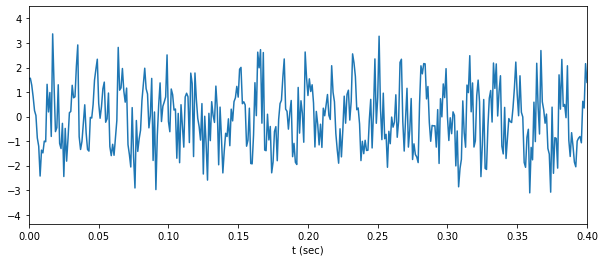

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(t, xn)
plt.xlim([0, 0.4])
plt.xlabel('t (sec)')
plt.show()

In [11]:
xn

array([1.54062557, 1.56391893, 1.27953114, ..., 0.51308281, 0.27792202,
       0.61886672])

In [14]:
xnt = fft(xn)

kr = np.hstack([np.arange(0, N/2), np.arange(-N/2, 0)])
fr = (Fs/N)*kr
fs = fftshift(fr)
xnt

array([-17.78981545 -0.j        ,  92.21451415-43.09008388j,
       -33.33422113+23.17561264j, ..., -44.44633833-79.68365844j,
       -33.33422113-23.17561264j,  92.21451415+43.09008388j])

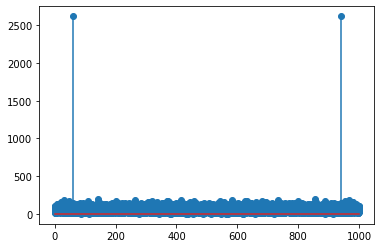

In [15]:
plt.stem(f, np.abs(xnt))
plt.show()

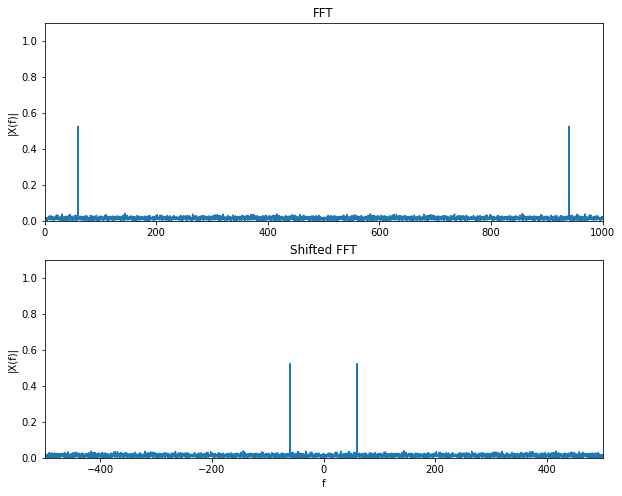

In [17]:
# original fft & shifted fft

xnt = fft(xn)/N
xntshift = fftshift(xnt)

kr = np.hstack([np.arange(0, N/2), np.arange(-N/2, 0)])
fr = (Fs/N)*kr
fs = fftshift(fr)

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(f, np.abs(xnt))
plt.ylabel('|X(f)|')
plt.ylim([0, 1.1])
plt.xlim([0, 1000])
plt.title('FFT')

plt.subplot(2,1,2)
plt.plot(fs, np.abs(xntshift))
plt.ylim([0, 1.1])
plt.xlim([-500, 500])
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.title('Shifted FFT')
plt.show()

## 5.2. Single-sided FFT (or Positive FFT)

- Only want the first half of the FFT, since the last is redundant (symmetric)
- 2 $\times$ amplitude except the DC component

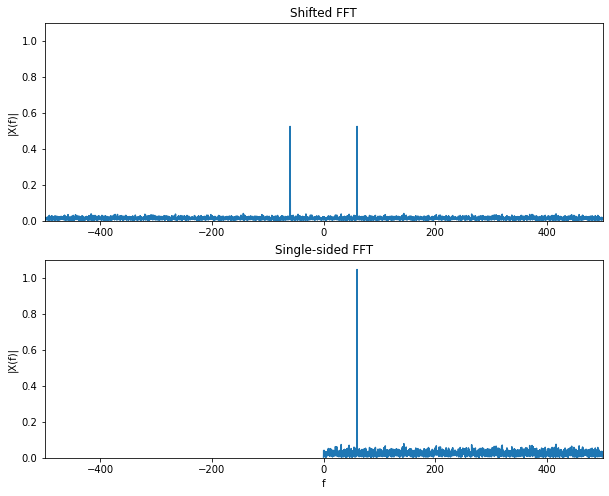

In [18]:
# single-sides fft

xnt = fft(xn)/N
xntss = xnt[0:int(N/2)+1] # 0:N/2
xntss[1:-1] = 2*xntss[1:-1]

fss = f[0:int(N/2)+1]

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(fs, np.abs(xntshift))
plt.ylabel('|X(f)|')
plt.ylim([0, 1.1])
plt.xlim([-500, 500])
plt.title('Shifted FFT')

plt.subplot(2,1,2)
plt.plot(fss, np.abs(xntss))
plt.xlim([-500, 500])
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.ylim([0, 1.1])
plt.title('Single-sided FFT')
plt.show()

# 6. STFT (Short-Time Fourier Transform)

In [22]:
Fs = 2**10                   # Sampling frequency                    
T = 1/Fs                     # Sampling period (or sampling interval)

N = 2*Fs                     # Total data points (signal length)

t = np.arange(0, N)*T        # Time vector (time range)

k = np.arange(0, N)          # vector from 0 to N-1
f = (Fs/N)*k                 # frequency range

x1 = np.cos(2*np.pi*50*t)
x2 = np.cos(2*np.pi*100*t)

x = np.zeros(t.shape)
x[0:int(N/2)] = x1[0:int(N/2)]
x[int(N/2):-1] = x2[int(N/2):-1]

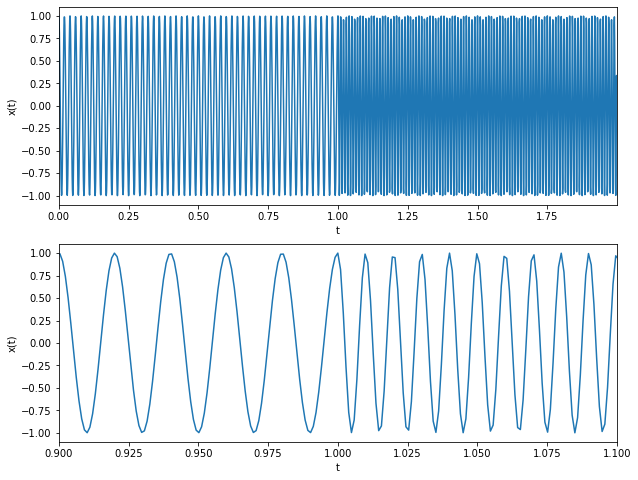

In [23]:
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([np.min(t), np.max(t)])

plt.subplot(2,1,2)
plt.plot(t, x)
plt.xlim([0.9, 1.1])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

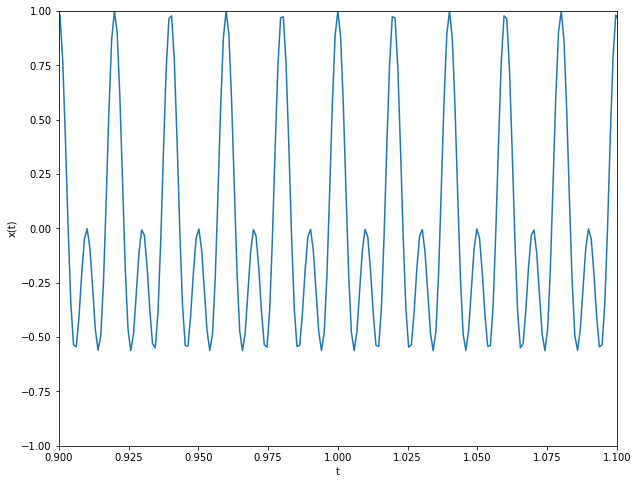

In [24]:
z = 1/2*(x1 + x2)

plt.figure(figsize = (10,8))
plt.plot(t, z)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0.9,1.1])
plt.ylim([-1,1])

plt.show()

FFT does not provide time information of the signal. 

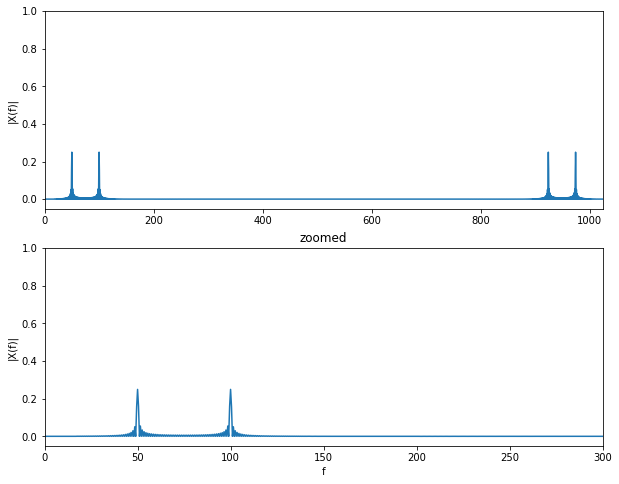

In [25]:
# plot FFT of two signal
# 1
xt = fft(x)/N

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(f, np.abs(xt))
plt.ylim([-0.05,1])
plt.ylabel('|X(f)|')
plt.xlim([np.min(f), np.max(f)])

plt.subplot(2,1,2)
plt.plot(f, np.abs(xt))
plt.xlim([0, 300])
plt.ylim([-0.05,1])
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.title('zoomed')
plt.show()

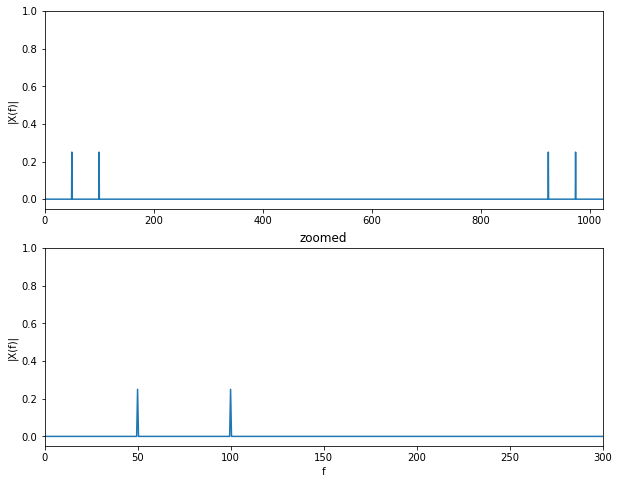

In [26]:
# 2
zt = fft(z)/N

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(f, np.abs(zt))
plt.ylim([-0.05,1])
plt.ylabel('|X(f)|')
plt.xlim([np.min(f), np.max(f)])

plt.subplot(2,1,2)
plt.plot(f, np.abs(zt))
plt.xlim([0, 300])
plt.ylim([-0.05,1])
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.title('zoomed')
plt.show()

- The spectral content of speech changes over time (non-stationary)
    - As an example, formants change as a function of the spoken phonemes
    - Applying the DFT over a long window does not reveal transitions in spectral content


- To avoid this issue, we apply the DFT over short periods of time
    - For short enough windows, speech can be considered to be stationary
    - Remember, though, that there is a time-frequency tradeoff here!


<img src="./image_files/stft.png" style="border:1px solid black" width="500">

<ipython-input-30-44aaeec672d8>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx)


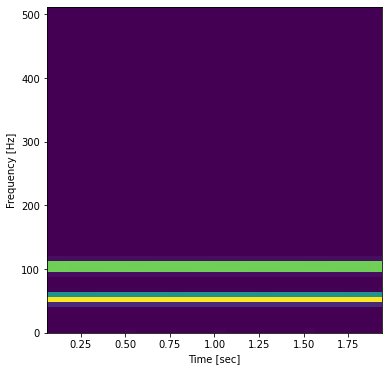

In [30]:
# 시험 나올 수 있음

from scipy.signal import spectrogram

windowsize = 2**7 #조정가능 # signal을 몇개씩 볼건지?
window = np.hanning(windowsize) #fix # windowsize만큼의 hanning을 연산해서 새로운 signal을 만들고 fft처럼 쌓아나감
nfft = windowsize #fix # fft를 할때 쓸 data 개수
noverlap = windowsize/2 #fix # 겹치지 않는 부분은 얼마만큼? 얼마만큼 이동할지에 대한정보. windowsize의 반씩

f, t, Sxx = spectrogram(z, # time domain signal
                        Fs, # sampling rate
                        window = window, # fix
                        noverlap = noverlap, #fix
                        nfft = nfft, #fix
                        scaling = 'spectrum', #fix
                        mode = 'psd') #fix

plt.figure(figsize = (6, 6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [62]:
Sxx.shape

(65, 31)

<ipython-input-67-06781b86349b>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx)


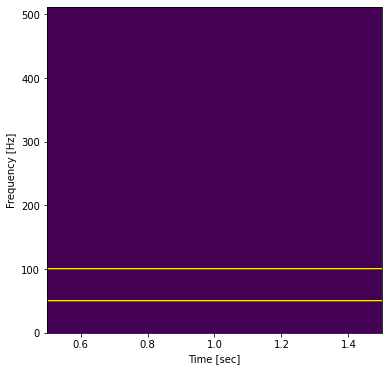

In [67]:
# 시험 나올 수 있음

from scipy.signal import spectrogram

windowsize = 2**10 #조정가능 # signal을 몇개씩 볼건지?
window = np.hanning(windowsize) #fix # windowsize만큼의 hanning을 연산해서 새로운 signal을 만들고 fft처럼 쌓아나감
nfft = windowsize #fix # fft를 할때 쓸 data 개수
noverlap = windowsize/2 #fix # 겹치지 않는 부분은 얼마만큼? 얼마만큼 이동할지에 대한정보. windowsize의 반씩

f, t, Sxx = spectrogram(z, # time domain signal
                        Fs, # sampling rate
                        window = window, # fix
                        noverlap = noverlap, #fix
                        nfft = nfft, #fix
                        scaling = 'spectrum', #fix
                        mode = 'psd') #fix

plt.figure(figsize = (6, 6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [68]:
Sxx.shape

(513, 3)

In [ ]:
# STFT of signal 2

<ipython-input-70-76d68f775e58>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx)


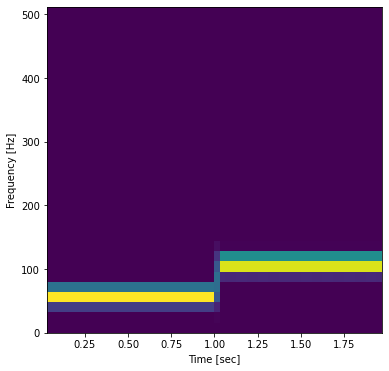

In [70]:
windowsize = 2**6 #조정가능 # signal을 몇개씩 볼건지?
window = np.hanning(windowsize) #fix # windowsize만큼의 hanning을 연산해서 새로운 signal을 만들고 fft처럼 쌓아나감
nfft = windowsize #fix # fft를 할때 쓸 data 개수
noverlap = windowsize/2 #fix # 겹치지 않는 부분은 얼마만큼? 얼마만큼 이동할지에 대한정보. windowsize의 반씩

f, t, Sxx = spectrogram(x, # time domain signal
                        Fs, # sampling rate
                        window = window, # fix
                        noverlap = noverlap, #fix
                        nfft = nfft, #fix
                        scaling = 'spectrum', #fix
                        mode = 'psd') #fix

plt.figure(figsize = (6, 6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<ipython-input-71-059dcfb61165>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx)


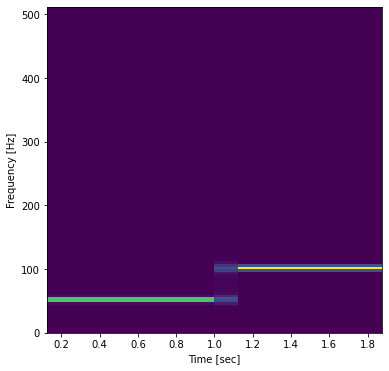

In [71]:
windowsize = 2**8 #조정가능 # signal을 몇개씩 볼건지?
window = np.hanning(windowsize) #fix # windowsize만큼의 hanning을 연산해서 새로운 signal을 만들고 fft처럼 쌓아나감
nfft = windowsize #fix # fft를 할때 쓸 data 개수
noverlap = windowsize/2 #fix # 겹치지 않는 부분은 얼마만큼? 얼마만큼 이동할지에 대한정보. windowsize의 반씩

f, t, Sxx = spectrogram(x, # time domain signal
                        Fs, # sampling rate
                        window = window, # fix
                        noverlap = noverlap, #fix
                        nfft = nfft, #fix
                        scaling = 'spectrum', #fix
                        mode = 'psd') #fix

plt.figure(figsize = (6, 6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Chirp

$$x[n] = 0.3 \cos \left(\frac{2 \pi}{3000000}n^2 \right)$$

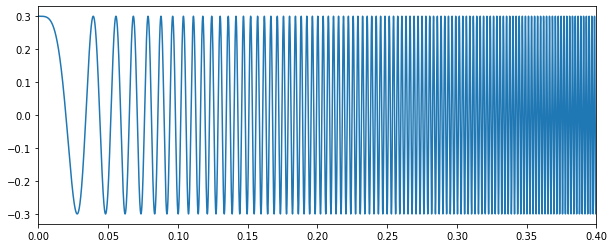

In [27]:
# chirp (https://en.wikipedia.org/wiki/Chirp)
n = np.arange(0,44100*2)
fs = 44100
chirp = 0.3*np.cos(2*np.pi/3000000*n**2)

# plot
plt.figure(figsize = (10, 4))
plt.plot(n/fs, chirp)
plt.xlim([0, 0.4])
plt.show()

In [28]:
Audio(chirp, rate = fs)

<ipython-input-31-0e8b44237036>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx)


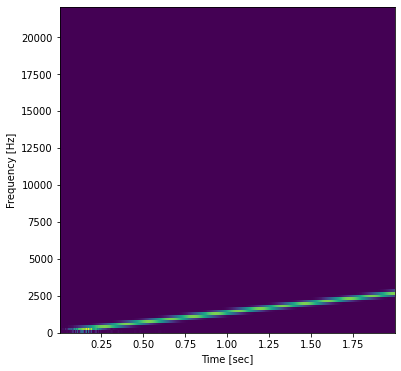

In [31]:
# chirp (https://en.wikipedia.org/wiki/Chirp)

windowsize = 2**8
window = np.hanning(windowsize)
nfft = windowsize
noverlap = windowsize/2

f, t, Sxx = spectrogram(chirp, 
                        fs, 
                        window = window, 
                        noverlap = noverlap, 
                        nfft = nfft, 
                        scaling = 'spectrum', 
                        mode = 'psd')

plt.figure(figsize = (6, 6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')